In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [14]:
def PointRender(mask, k, beta,uncertainty=3):
    '''(1). Over generation: Generate the candidate points by random sampling kN points (k>1) from a uniform distribution, 
    (2).Importance sampling: Compute a task specific uncertainty estimate by interpolating the coarse prediction values at all kN points
    and select the most uncertainty  beta*N points. (3). Coverage: Sample the remaining  points from uniform distribution. '''
    w,h = mask.shape
    # print(w)
    N = int(beta*k*w*h/25)
    xy_min = [0, 0]
    xy_max = [w-1, h-1]
    points = np.random.uniform(low=xy_min, high=xy_max, size=(N,2))
    #print(points)
    if(beta>1 or beta<0): 
        print("beta should be in range [0,1]")
        return ULL
    
    # generating biased points
    if beta ==0: return points
    res = []
    edges_array= edge_array(mask,uncertainty)
    for p in points:
        if near(p,edges_array):
            res.append(p)

    others = int((1-beta)*w*h/25)
    not_edge_points = np.random.uniform(low=xy_min, high=xy_max, size=(others,2))
    for p in not_edge_points:
        res.append(p)
    return res
    


def near(point, edge_array):
    '''This function is used to identify if the point is near the edge
    Returns true if the point is near the edge'''
    x, y = point
    x, y = int(x), int(y)
    return edge_array[x][y]>0


def edge_array (mask,uncertainty):
    '''
    This function identifies the edges of the mask
    This will return a array sized (w,h), 
    store the max-min value in its neighbor.
    '''
    w,h = mask.shape
    padded = np.pad(mask, uncertainty, 'edge')
    # Gererate an array to store the results
    res = np.zeros(mask.shape)
    
    # Identifies the edges of the mask
    for i in range(w):
        for j in range(h):
            neighbor = padded[i:i+2*uncertainty,j:j+2*uncertainty]
            _max = neighbor.max()
            _min = neighbor.min()
            res[i,j] = (_max-_min)
    
    return res

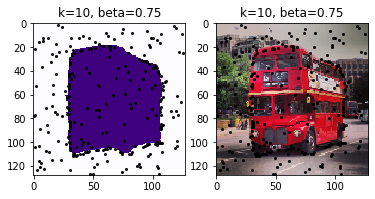

In [15]:
resolution = 128
wh = (resolution,resolution)
mask = np.asarray(Image.open("bus661663.png").resize(wh))
image = np.asarray(Image.open("bus.jpg").resize(wh))
mask = mask[:,:,0]

selection = PointRender(mask,10,0.75,uncertainty=1)
selection = list(zip(*selection))

plt.subplot(121)
plt.imshow(mask,cmap="Purples")
plt.scatter(selection[1],selection[0],c='black',s=4)
plt.title('k=10, beta=0.75')

plt.subplot(122)
plt.imshow(image,cmap="Purples")
plt.scatter(selection[1],selection[0],c='black',s=4)
plt.title('k=10, beta=0.75')

plt.savefig('buss.jpg',dpi=400)

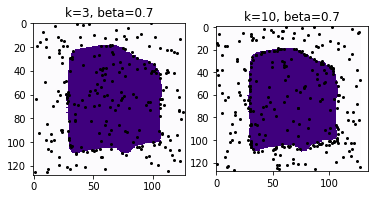

In [16]:
resolution = 128
wh = (resolution,resolution)
mask = np.asarray(Image.open("bus661663.png").resize(wh))

mask = mask[:,:,0]

selection = PointRender(mask,3,0.7,uncertainty=1)
selection = list(zip(*selection))

plt.subplot(121)
plt.imshow(mask,cmap="Purples")
plt.scatter(selection[1],selection[0],c='black',s=4)
plt.title('k=3, beta=0.7')

selection1 = PointRender(mask,10,0.7,uncertainty=1)
selection1 = list(zip(*selection1))

plt.subplot(122)
plt.imshow(mask,cmap="Purples")
plt.scatter(selection1[1],selection1[0],c='black',s=4)
plt.title('k=10, beta=0.7')
plt.savefig('busdot.jpg',dpi=400)

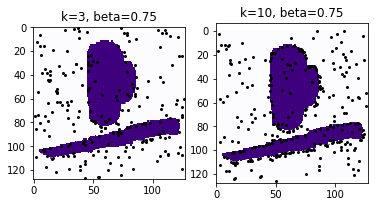

In [17]:
resolution = 128
wh = (resolution,resolution)
mask = np.asarray(Image.open("cup 690396.png").resize(wh))

mask = mask[:,:,0]

selection = PointRender(mask,3,0.75,uncertainty=1)
selection = list(zip(*selection))

plt.subplot(121)
plt.imshow(mask,cmap="Purples")
plt.scatter(selection[1],selection[0],c='black',s=4)
plt.title('k=3, beta=0.75')

selection1 = PointRender(mask,10,0.75,uncertainty=1)
selection1 = list(zip(*selection1))

plt.subplot(122)
plt.imshow(mask,cmap="Purples")
plt.scatter(selection1[1],selection1[0],c='black',s=4)
plt.title('k=10, beta=0.75')

plt.savefig('cupdot.jpg',dpi=400)